# Imports 

In [153]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cross Validating
from sklearn.model_selection import train_test_split, cross_val_score

# GridSearch to tune the model w/ the best parameters
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Import roc_curve from sklearn
from sklearn.metrics import roc_curve, roc_auc_score

# Reading Training csv file

In [154]:
data_train = pd.read_csv('data/churn_train.csv')

In [155]:
data_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [156]:
data_train.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct'],
      dtype='object')

# 1. Data EDA

In [157]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [158]:
data_train.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Checking on missing values. 
Substantial amount of avg_rating_driver is missing. 

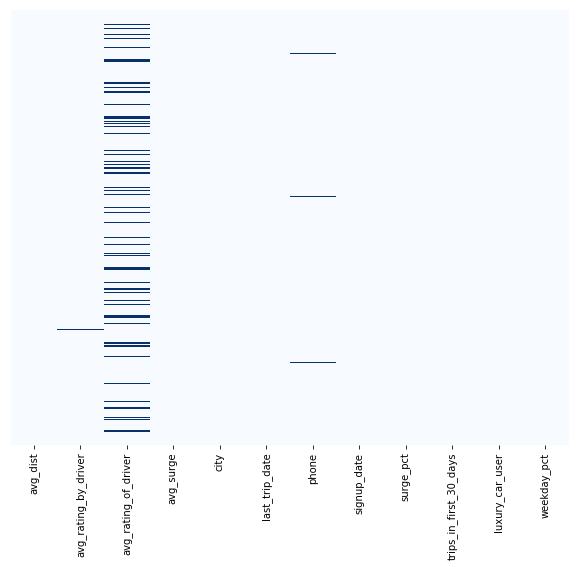

In [159]:
plt.figure(figsize = (10, 8))
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

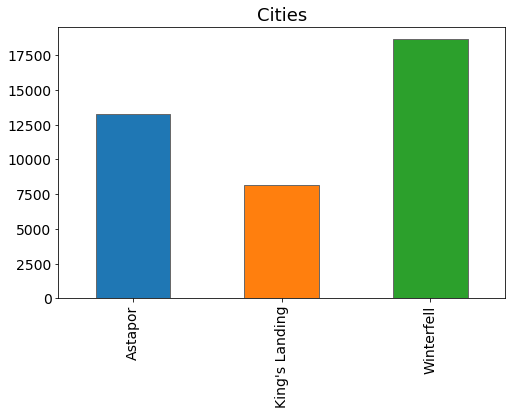

In [160]:
plt.title('Cities', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data['city'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

In [126]:
data.phone.value_counts(),  sum(data_train.phone.value_counts())

(iPhone     27628
 Android    12053
 Name: phone, dtype: int64, 39681)

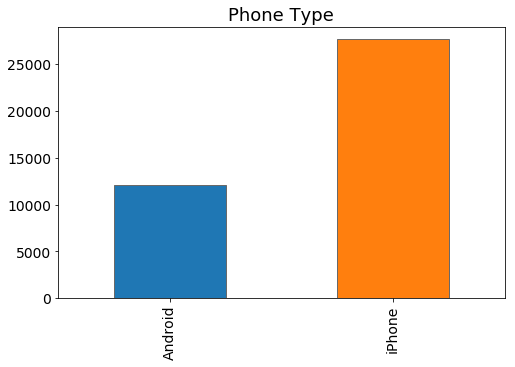

In [127]:
plt.title('Phone Type', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data_train['phone'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

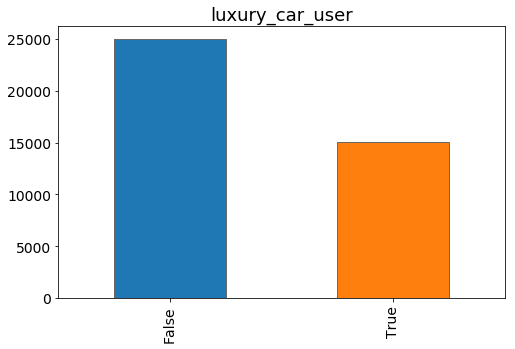

In [128]:
plt.title('luxury_car_user', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data_train['luxury_car_user'].value_counts().sort_index().plot.bar(
    figsize = (8,5),
    fontsize = 14, edgecolor='dimgrey')

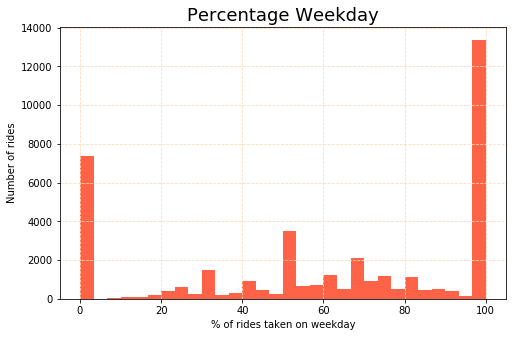

In [192]:
plt.title('Percentage Weekday', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('% of rides taken on weekday')
plt.ylabel('Number of rides')
data['weekday_pct'].hist(bins = 30, figsize = (8,5), color = 'Tomato')


(0, 45)

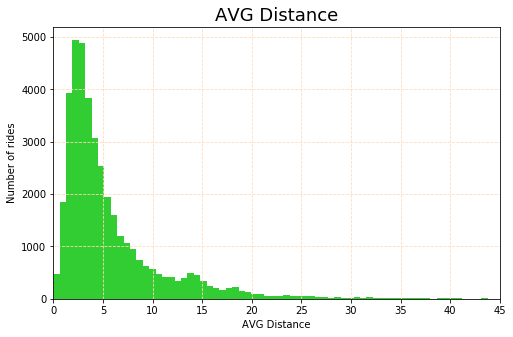

In [179]:
plt.title('AVG Distance', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('AVG Distance')
plt.ylabel('Number of rides')
data_train['avg_dist'].hist(bins = 250, figsize = (8,5), color = 'Limegreen')
plt.xlim((0, 45)) 

(0, 30)

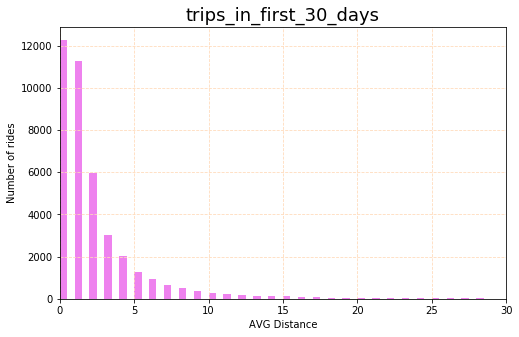

In [190]:
plt.title('trips_in_first_30_days', fontsize = 18)
plt.grid(c = 'peachpuff', linestyle = '--')
plt.xlabel('AVG Distance')
plt.ylabel('Number of rides')
data_train['trips_in_first_30_days'].hist(bins = 250, figsize = (8,5), color = 'Violet')
plt.xlim((0, 30)) 

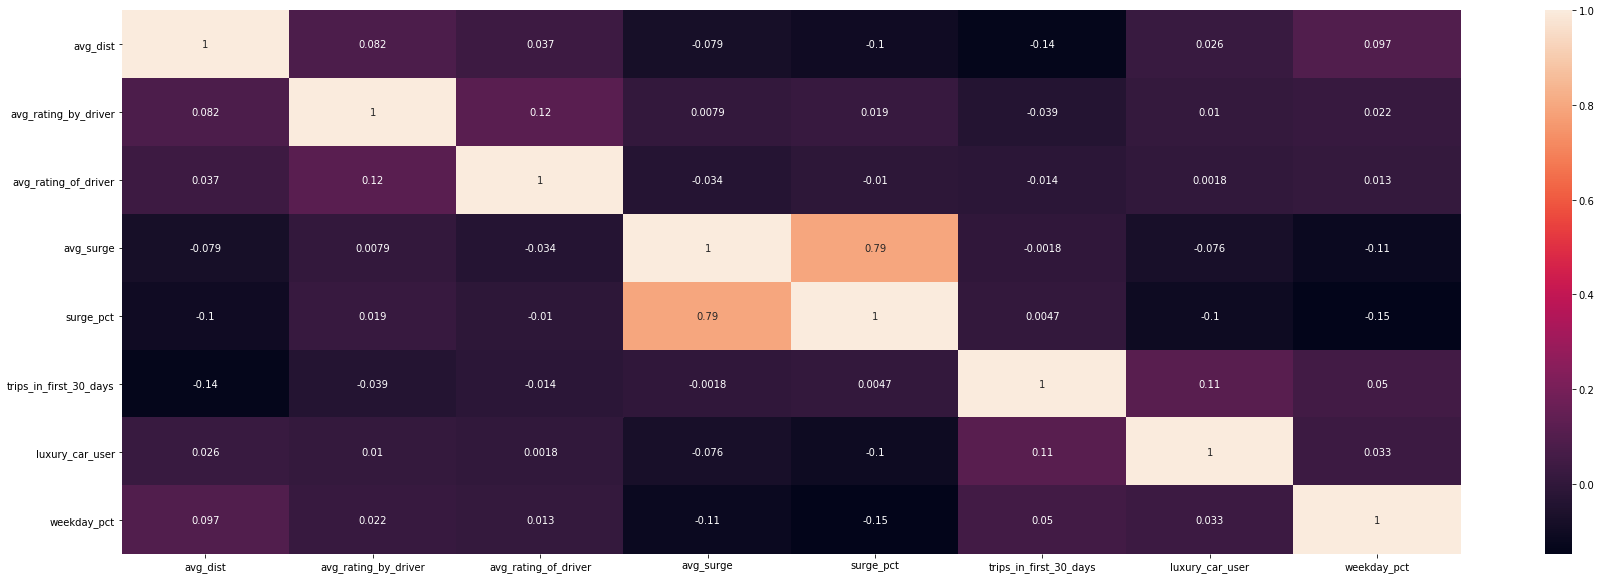

In [161]:
plt.figure(figsize = (30, 10))
sns.heatmap(data_train.corr(), annot = True)

## 2. DATA Cleaning and Handling

### 2.1 Getting Target
Churn would be a customer that did not use the service in 30 days (or specify dif number in f-n)

In [162]:
def get_target(df, days):
    df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
    cut_off = df['last_trip_date'].dt.date.max() -  pd.to_timedelta(days, unit='d')
    y = (df['last_trip_date'] < cut_off).astype(int)
    return y

In [163]:
def drop_target(df):
    df_copy = df.copy()
    df_copy = df_copy.drop(["last_trip_date"], 1)
    return df_copy

In [173]:
y_train = get_target(data_train, 30)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


In [174]:
data_train.drop('signup_date', axis=1, inplace=True)

### 2.2 Dealing w/categorical data. Creating Dummy Variables

In [164]:
def clean_city(df):
    df_copy = df.copy()
    cities = pd.get_dummies(df_copy["city"])[["Astapor", "Winterfell"]]
    df_copy = pd.concat([df_copy, cities], 1)
    df_copy = df_copy.drop(["city"], 1)
    return df_copy

In [165]:
data_train = clean_city(data_train)

In [99]:
def clean_phone(df):
    '''
    INPUT: pandas df
    OUTPUT: df w/dummy variables new columns for phone types
    '''
    df_copy = df.copy()
    phones = pd.get_dummies(df_copy["phone"])[["iPhone"]]
    df_copy = pd.concat([df_copy, phones], 1)
    df_copy = df.drop(["phone"], 1)
    return df_copy


In [166]:
data_train = clean_phone(data_train)

In [73]:
def clean_lux_car(df):
    '''
    INPUT: pandas df
    Function converts Boolean values to binary
    OUTPUT: 
    '''
    df_copy = df.copy()
    df_copy['luxury_car_user'] = df_copy['luxury_car_user'].astype(int)
    return df_copy

In [167]:
data_train = clean_lux_car(data_train)

In [170]:
def clean_avg_rating_by_driver(df):
    
    '''
    INPUT: pandas df
    Filling null values w/mean avg_rating
    OUTPUT: 
    '''
    
    df["avg_rating_by_driver"] = df.groupby("avg_dist").transform(lambda x: x.fillna(x.mean())).astype(float)
    df["avg_rating_of_driver"] = df.groupby("avg_dist").transform(lambda x: x.fillna(x.mean())).astype(float)
    
    return df

In [171]:
data_train  = clean_avg_rating_by_driver(data_train)

In [176]:
data_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,Winterfell
0,6.94,5.0,5.0,1.00,2014-05-03,0.0,0,0,100.0,1,0
1,8.06,5.0,5.0,1.00,2014-01-26,0.0,2,1,0.0,1,0
2,21.50,4.0,4.0,1.00,2014-05-21,0.0,1,1,100.0,0,1
3,9.46,5.0,5.0,2.75,2014-01-10,100.0,1,0,100.0,0,1
4,13.77,5.0,5.0,1.00,2014-05-13,0.0,0,0,100.0,0,1


## 3. Preparing to train models 

In [175]:
# if __name__ == '__main__':

# y_train = get_target(data_train, 30)

# data_train = clean_city(data_train)
# # data_train = clean_phone(data_train)
# # data_train = clean_lux_car(data_train)
# data_train  = clean_avg_rating_by_driver(data_train)

# churn_t.drop('signup_date', axis=1, inplace=True)
# X = churn_t.values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [198]:
merged_df = pd.concat([data_train, y_train], axis = 1)

# result = pd.concat([dataframe, series], axis=1)

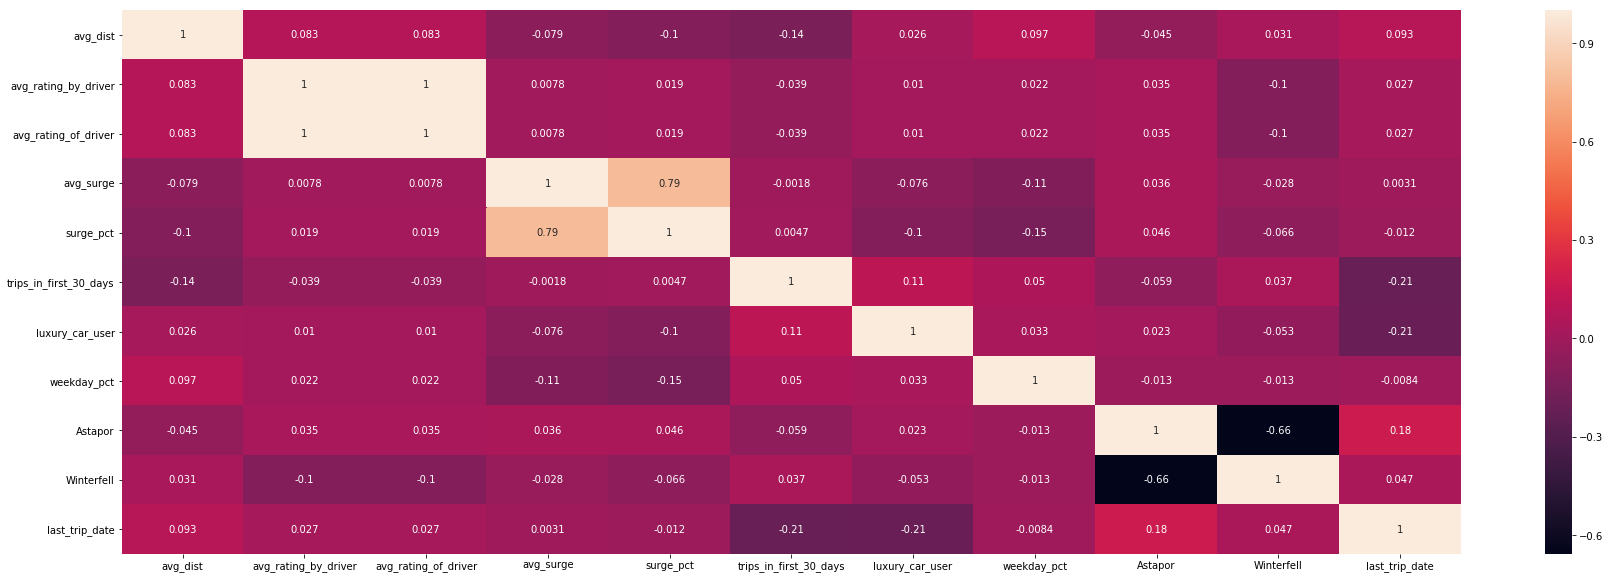

In [199]:
plt.figure(figsize = (30, 10))
sns.heatmap(merged_df.corr(), annot = True)